# Ballpark analysis
This notebook showcases how we created the visualizations for the ballparks and filtered the data into a submetric for the overall ranking.

First, we need to import some packages that will help us read and map the data provided by WPRDC.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

This next section just defines some constants for the eventual graph.

In [2]:
FG        = '#ffffff'
BG        = '#000000'
BLACK     = '#000000'
DARK_BLUE = '#141B4D'
DARK_GOLD = '#B58500'
PITT_GOLD = '#FFB81C'
GREEN     = '#22ff22'
PAD       = .5
WPAD      = 1
HPAD      = 1

After we created our constants and imported our packages, we can read in the neighborhood and ballfield shapefiles.

In [3]:
neighbors = gpd.read_file('Neighborhoods_Files/Neighborhoods_.shp')
fields =  gpd.read_file('Ballfields/Ballfields_PGH.shp')
nb = pd.read_csv('Neighborhoods_Files/pgh_neighborhoods.csv')
nb = nb[['name']]

Now we can create our first visualization. Geopandas uses latitude, longitude, and some other variables to determine how to plot everything in the shapefile. Since the ballparks are all within the City of Pittsburgh (due to the scope of the WPRDC dataset), we do not need to do any geographic filtering. All the following code is just creating the visualization and making sure it is formatted nicely.

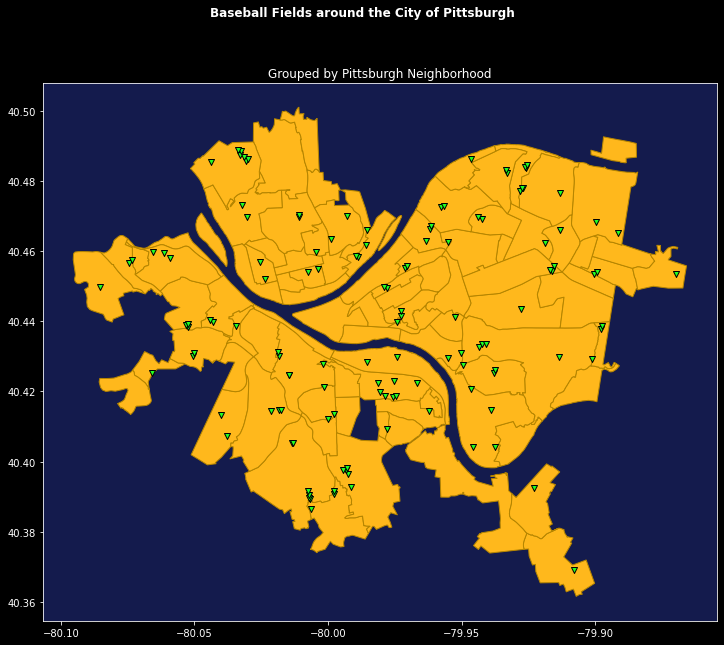

In [4]:
fig, ax = plt.subplots(figsize = (10,10))
ax.set_facecolor(DARK_BLUE)
neighbors.plot(ax=ax, color=PITT_GOLD, edgecolor=DARK_GOLD)
fields.plot(ax=ax, edgecolor=BLACK, marker='v', color=GREEN)
fig.patch.set_facecolor(BG)
ax.yaxis.set_tick_params(color=FG, labelcolor=FG)
ax.xaxis.set_tick_params(color=FG, labelcolor=FG)
plt.suptitle("Baseball Fields around the City of Pittsburgh", color=FG, weight='bold')
plt.title("Grouped by Pittsburgh Neighborhood", color=FG)
plt.tight_layout(pad=PAD, w_pad=WPAD, h_pad=HPAD)
for spine in ax.spines.values():
    spine.set_color(FG)
plt.show()

From this visualization, we can clearly see that there are some neighborhoods with many ballparks and some with none. This further shows that the dataset can be used as a discriminating metric.

To get the number of fields, we can use the contains() function from gpd. We add this as a new attribute (numFields) to the neighbors dataframe

In [5]:
flds = fields.copy() 

# We're going to keep a list of how many fields we find.
fields_in_hoods = []

# Loop over neighbors with index i.
for i, hood in neighbors.iterrows():

    # Keep a list of fields in this hood
    fields_in_hood = []

    # Now loop over all fields with index j.
    for j, pt in flds.iterrows():
        if hood.geometry.contains(pt.geometry):
            # Then it's a hit! Add it to the list,
            # and drop it so we have less hunting.
            fields_in_hood.append(pt.geometry)
            flds = flds.drop([j])
    fields_in_hoods.append(len(fields_in_hood))

# Add the number of fields for each hood to the dataframe.
nb['fields'] = gpd.GeoSeries(fields_in_hoods)

<ipython-input-5-05332a5c5ab4>:22: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  nb['fields'] = gpd.GeoSeries(fields_in_hoods)


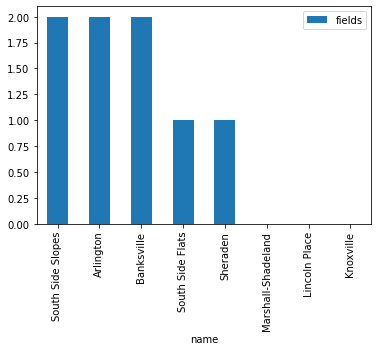

In [6]:
nb = nb[:8]
nb = nb.sort_values('fields', ascending=False) # we sort by highest first
nb.plot.bar(x='name')

In [19]:
points = gpd.sjoin(fields, neighbors, how="inner", op='intersects')

# Add a field with 1 as a constant value
points['const']=1

# Group according to the column by which you want to aggregate data
nb = points.groupby(['hood'], as_index=False).sum()
nb = nb[['hood', 'const']]
nb = nb.sort_values('const', ascending=False) # we sort by highest first

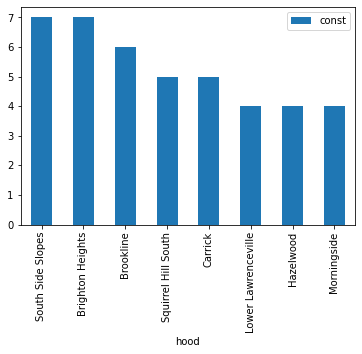

In [22]:
nb = nb[:8]
nb.plot.bar(x='hood')